# Import Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

## Loading Datasets

In [2]:
# load datasets for two subjects, Math and Portuguese

math_data = pd.read_csv("student-mat.csv", sep=';')
port_data = pd.read_csv("student-por.csv", sep=';')

## Data Preparation

In [3]:
# merge datasets

data = pd.concat([math_data, port_data])

In [4]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
data.shape

(1044, 33)

In [6]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
# Rename columns 

data.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_grade','period2_grade','final_score']

In [8]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9

data['final_grade'] = 'na'
data.loc[(data.final_score >= 15) & (data.final_score <= 20), 'final_grade'] = 'Good' 
data.loc[(data.final_score >= 10) & (data.final_score <= 14), 'final_grade'] = 'Average' 
data.loc[(data.final_score >= 0) & (data.final_score <= 9), 'final_grade'] = 'Poor' 

data.head()

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_grade,period2_grade,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Average
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Average


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   school                 1044 non-null   object
 1   sex                    1044 non-null   object
 2   age                    1044 non-null   int64 
 3   address                1044 non-null   object
 4   family_size            1044 non-null   object
 5   parents_status         1044 non-null   object
 6   mother_education       1044 non-null   int64 
 7   father_education       1044 non-null   int64 
 8   mother_job             1044 non-null   object
 9   father_job             1044 non-null   object
 10  reason                 1044 non-null   object
 11  guardian               1044 non-null   object
 12  commute_time           1044 non-null   int64 
 13  study_time             1044 non-null   int64 
 14  failures               1044 non-null   int64 
 15  school_support        

In [10]:
data.isnull().sum()

school                   0
sex                      0
age                      0
address                  0
family_size              0
parents_status           0
mother_education         0
father_education         0
mother_job               0
father_job               0
reason                   0
guardian                 0
commute_time             0
study_time               0
failures                 0
school_support           0
family_support           0
paid_classes             0
activities               0
nursery                  0
desire_higher_edu        0
internet                 0
romantic                 0
family_quality           0
free_time                0
go_out                   0
weekday_alcohol_usage    0
weekend_alcohol_usage    0
health                   0
absences                 0
period1_grade            0
period2_grade            0
final_score              0
final_grade              0
dtype: int64

*There is no missing values in the dataset*

# Exploratory Data Analysis

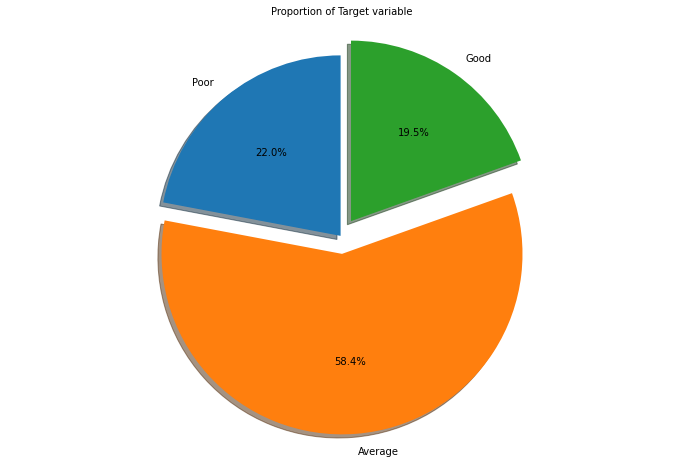

In [11]:
# Pie chart to display the amount (percentage) distribution of the Target Variable

labels = 'Poor', 'Average', 'Good'
sizes = [data.final_grade[data['final_grade']=='Poor'].count(), data.final_grade[data['final_grade']=='Average'].count(), data.final_grade[data['final_grade']=='Good'].count()]
explode = (0, 0.1, 0.1)
fig1, ax1 = plt.subplots(figsize=(12, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Target variable", size = 10)
plt.show()

*Above chart depicts that the performance of most of the students (around 60%) are average*

Text(0.5, 1.0, 'Correlation Heatmap')

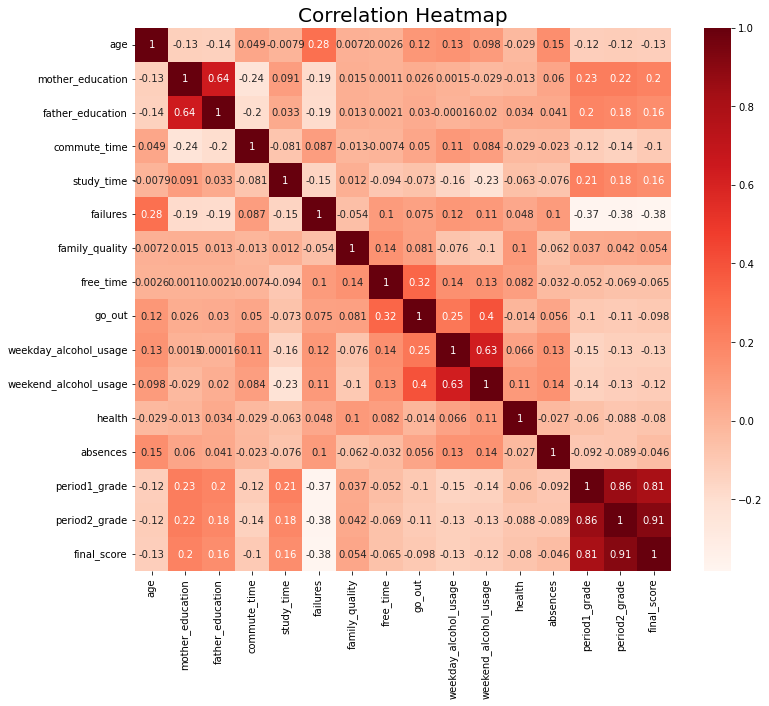

In [12]:
# see correlation between variables through a correlation heatmap

corr = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

### Final Grade By Romantic Status
**see how students in a romantic relationship vs. those not in a relationship perform**

In [13]:
# Romantic status

perc = (lambda col: col/col.sum())
index = ['Poor','Average','Good']
romance_tab1 = pd.crosstab(index=data.final_grade, columns=data.romantic)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)

<Figure size 432x288 with 0 Axes>

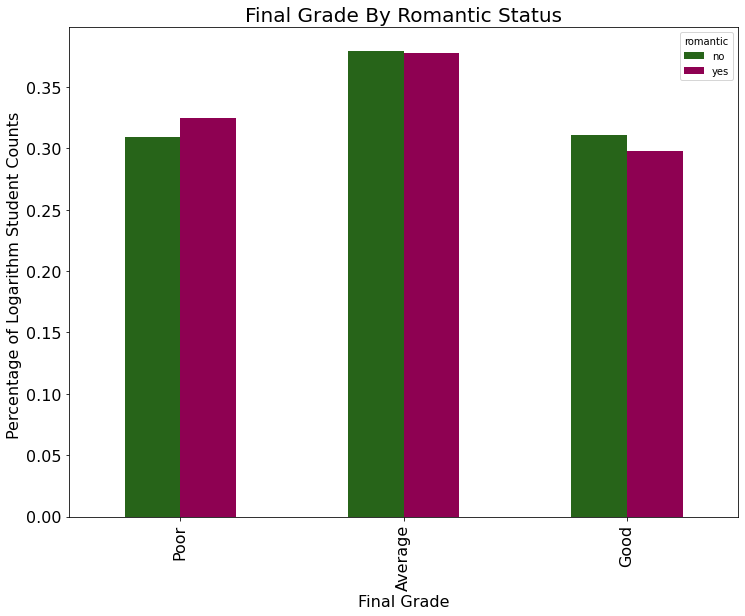

In [14]:
plt.figure()
romance_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(12, 9))
plt.title('Final Grade By Romantic Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

In [15]:
# chi-square test result -- significant!
import statsmodels.api as sm
romance_table = sm.stats.Table(romance_tab1)
romance_rslt = romance_table.test_nominal_association()
romance_rslt.pvalue

0.038810128743959726

*Hyphothesis Testing confirmed, romantic status has a significant correlation with final grade. Don't be i a relationship if you want to perform better.*

### Final Grade By Alcohol Consumption
**See how alcohol consumption influences students' final grade**



In [16]:
# create good student dataframe
good = data.loc[data.final_grade == 'good']
good['good_alcohol_usage']=good.weekend_alcohol_usage
# create poor student dataframe
poor = data.loc[data.final_grade == 'poor']
poor['poor_alcohol_usage']=poor.weekend_alcohol_usage

In [17]:
# weekend alcohol consumption
alc_tab1 = pd.crosstab(index=data.final_grade, columns=data.weekend_alcohol_usage)
alc_tab = np.log(alc_tab1)
alc_perc = alc_tab.apply(perc).reindex(index)

Text(0.5, 0, 'Final Grade')

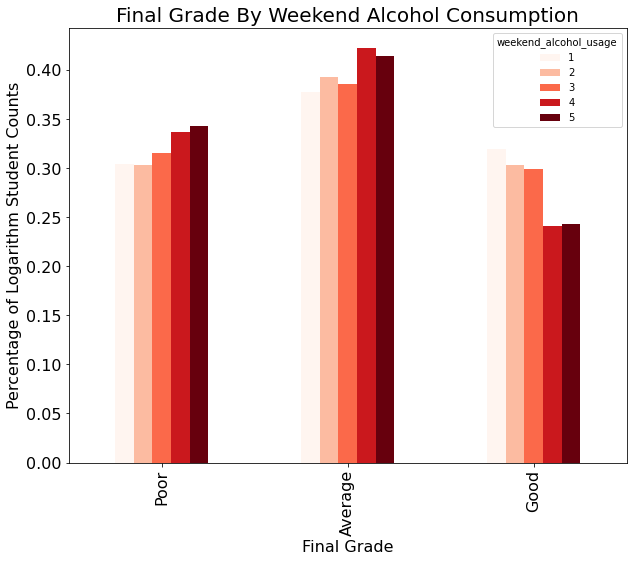

In [18]:
alc_perc.plot.bar(colormap="Reds", figsize=(10,8), fontsize=16)
plt.title('Final Grade By Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

*Hyphothesis Testing confirmed, weekend alcohol consumption has a significant correlation with final grade.*

In [19]:
# chi-square test result -- significant!
import statsmodels.api as sm
alc_table = sm.stats.Table(alc_tab1)
alc_rslt = alc_table.test_nominal_association()
alc_rslt.pvalue

0.007592294056368298

*No Alcohol, No way*

### Final Grade By Parents Education Level
**see how parents' education level influence student performance**

In [20]:
good['good_student_father_education'] = good.father_education
poor['poor_student_father_education'] = poor.father_education
good['good_student_mother_education'] = good.mother_education
poor['poor_student_mother_education'] = poor.mother_education

In [21]:
# use OLS to see coefficients
X_edu = data[['mother_education','father_education']]
y_edu = data.final_score
edu = sm.OLS(y_edu, X_edu)
results_edu = edu.fit()
results_edu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            final_score   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.814
Method:                 Least Squares   F-statistic:                              2287.
Date:                Wed, 27 Jul 2022   Prob (F-statistic):                        0.00
Time:                        00:41:16   Log-Likelihood:                         -3194.8
No. Observations:                1044   AIC:                                      6394.
Df Residuals:                    1042   BIC:                                      6403.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
mother_education     2.4078      0.166     14.527      0.000       2.083       2.733
father_education     1.5746      0.179      8.806      0.000       1.224       1.926
==============================================================================
Omnibus:                       35.858   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.773
Skew:                          -0.427   Prob(JB):                     2.31e-09
Kurtosis:                       3.430   Cond. No.                         5.72
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*OLS tells that parents' education level has a positive correlation with students' final score. Comparatively, mother's education level has bigger influence than father's education level!!*

### Final Grade By Frequency Of Going Out
**See how frequency of goig out with friend influence students' final performance**

Text(0.5, 0, 'Frequency of Going Out')

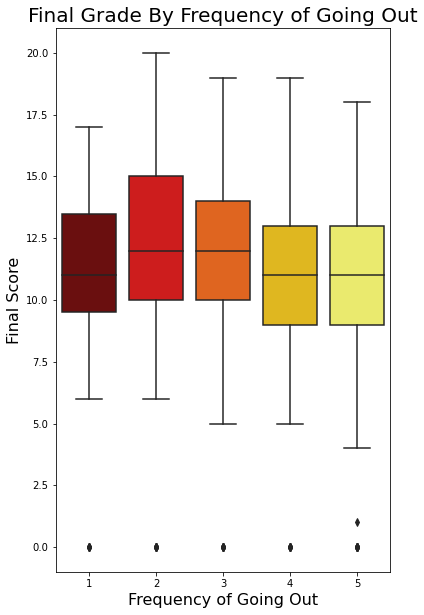

In [22]:
# going out with friends (numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,10))
sns.boxplot(x='go_out', y='final_score', data=data, palette='hot')
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Final Score', fontsize=16)
plt.xlabel('Frequency of Going Out', fontsize=16)

Text(0.5, 0, 'Final Grade')

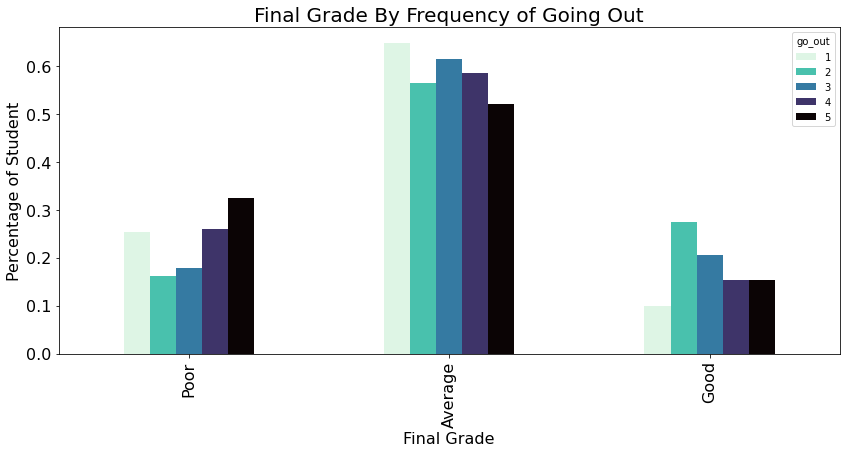

In [23]:
out_tab = pd.crosstab(index=data.final_grade, columns=data.go_out)
out_perc = out_tab.apply(perc).reindex(index)

out_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

Hyphothesis Testing confirmed, the frequency of going out with friends has a significant correlation with students' final performance.

In [24]:
# chi-square test result -- significant!
out_table = sm.stats.Table(out_tab)
out_rslt = out_table.test_nominal_association()
out_rslt.pvalue

4.365198328282194e-05

*It is suggested to all the students to limit the frequency of hanging out with friends*

### Final Grade By Desire To Go To College
**see how desire to go to college influence student final performance**

Text(0.5, 0, 'Age')

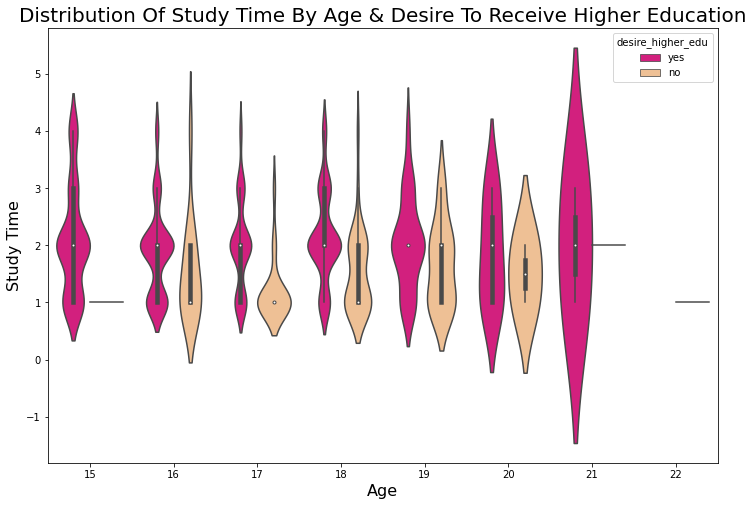

In [25]:
# Desire for higher education and study time by age 
plt.figure(figsize=(12,8))
sns.violinplot(x='age', y='study_time', hue='desire_higher_edu', data=data, palette="Accent_r", ylim=(1,6))
plt.title('Distribution Of Study Time By Age & Desire To Receive Higher Education', fontsize=20)
plt.ylabel('Study Time', fontsize=16)
plt.xlabel('Age', fontsize=16)

In [26]:
higher_tab = pd.crosstab(index=data.final_grade, columns=data.desire_higher_edu)
higher_perc = higher_tab.apply(perc).reindex(index)

Hyphothesis Testing confirmed, the desire of going to college has a significant correlation with students' final performance.

In [27]:
# chi-square test result -- significant!
import statsmodels.api as sm
higher_table = sm.stats.Table(higher_tab)
higher_rslt = higher_table.test_nominal_association()
higher_rslt.pvalue

2.2470914018413168e-13

*It was recommended that pay maximum attention in the class and do not bunk the college*

# Feature Engineering

In [28]:
# create dataframe dfd for classification
df = data.copy()
df = df.drop([ 'final_score'], axis=1)

In [29]:
# label encode final_grade
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.final_grade = le.fit_transform(df.final_grade)

In [30]:
# dataset train_test_split
from sklearn.model_selection import train_test_split
X = df.drop('final_grade',axis=1)
y = df.final_grade
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [31]:
# get dummy varibles 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [32]:
# see total number of features
len(list(X_train))

58

# Model Building & Evaluation

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Fit the Logistic Regression Model

In [34]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
# Making Prediction

y_pred_lr = log_reg.predict(X_test)

In [36]:
# Evaluate the Performance

print("Accuracy Score:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Accuracy Score: 0.8535031847133758
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       184
           1       0.90      0.84      0.87        67
           2       0.84      0.67      0.74        63

    accuracy                           0.85       314
   macro avg       0.86      0.81      0.83       314
weighted avg       0.85      0.85      0.85       314



### Fit the Decision Tree Model

In [37]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
# Making Prediction

y_pred_dt = dt.predict(X_test)

In [39]:
# Evaluate the Performance

print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Accuracy Score: 0.8375796178343949
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       184
           1       0.88      0.88      0.88        67
           2       0.74      0.67      0.70        63

    accuracy                           0.84       314
   macro avg       0.82      0.81      0.82       314
weighted avg       0.84      0.84      0.84       314



### Fit the Random Forest Classifier

In [40]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
# Making Prediction

y_pred_rf = dt.predict(X_test)

In [42]:
# Evaluate the Performance

print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy Score: 0.8375796178343949
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       184
           1       0.88      0.88      0.88        67
           2       0.74      0.67      0.70        63

    accuracy                           0.84       314
   macro avg       0.82      0.81      0.82       314
weighted avg       0.84      0.84      0.84       314



Text(87.0, 0.5, 'Truth')

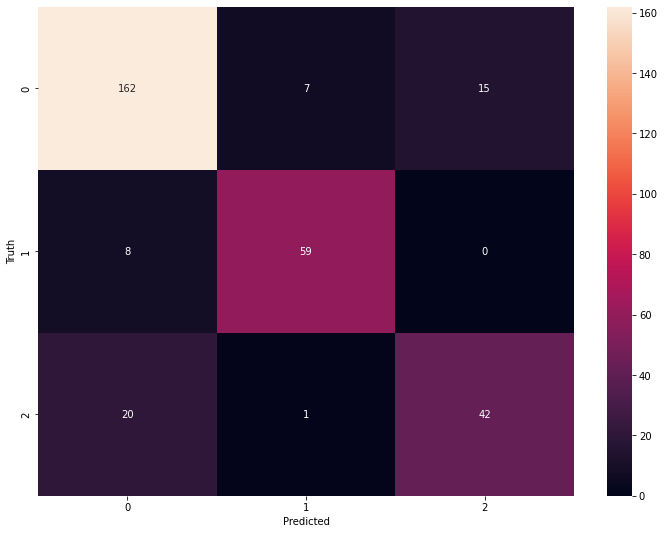

In [43]:
# Plotting Confusion Matrix

import seaborn as sn
cm = confusion_matrix(y_test,y_pred_rf)

plt.figure(figsize = (12,9))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Analysis results:

1. Students should not be in a relationship.
2. Students should not consume Alcohol.
3. Students should not hang out with their friends frequently.
4. Students hould go the college everyday and pay maximum attention in the class.
5. Students should focus on self study for atleast 10 hours weekly.
6. Take care of their health, so that they can focus more on study.
7. Parents educational level should be so that they can contribute in their study.